# Creating Data Set

In [1]:
import pandas as pd

In [52]:
import glob2
path = '/Users/haritha/Downloads/bbc-2/business/*.txt'
filenames = glob2.glob(path)  # list of all .txt files in the directory
text = [0]*len(filenames)
i = 1
for file in filenames:
    f=open(file, "r")
    text[i-1] = f.read()
    i = i+1
        
            

In [70]:
from pandas import DataFrame
df = DataFrame (text,columns=['text'])
df['Label'] = 'Business'

In [71]:
df.head()

,text,Label
0,UK economy facing 'major risks'\n\nThe UK manu...,Business
1,Aids and climate top Davos agenda\n\nClimate c...,Business
2,Asian quake hits European shares\n\nShares in ...,Business
3,India power shares jump on debut\n\nShares in ...,Business
4,Lacroix label bought by US firm\n\nLuxury good...,Business


In [53]:
path = '/Users/haritha/Downloads/bbc-2/entertainment/*.txt'
filenames = glob2.glob(path)  # list of all .txt files in the directory
text_ent = [0]*len(filenames)
i = 1
for file in filenames:
    f=open(file, "r")
    text_ent[i-1] = f.read()
    i = i+1



    


In [72]:
df1 = DataFrame (text_ent,columns=['text'])
df1['Label'] = 'Entertainment'

In [73]:
df1.head()

,text,Label
0,Musicians to tackle US red tape\n\nMusicians' ...,Entertainment
1,"U2's desire to be number one\n\nU2, who have w...",Entertainment
2,Rocker Doherty in on-stage fight\n\nRock singe...,Entertainment
3,Snicket tops US box office chart\n\nThe film a...,Entertainment
4,Ocean's Twelve raids box office\n\nOcean's Twe...,Entertainment


In [54]:
path = '/Users/haritha/Downloads/bbc-2/politics/*.txt'
filenames = glob2.glob(path)  # list of all .txt files in the directory
text_pol = [0]*len(filenames)
i = 1

for file in filenames:
    f=open(file, "r")
    text_pol[i-1] = f.read()
    i = i+1



In [74]:
df2 = DataFrame (text_pol,columns=['text'])
df2['Label'] = 'Politics'
df2.head()

,text,Label
0,Baron Kinnock makes Lords debut\n\nFormer Labo...,Politics
1,Howard taunts Blair over splits\n\nTony Blair'...,Politics
2,Donor attacks Blair-Brown 'feud'\n\nThe report...,Politics
3,Cardinal criticises Iraq war cost\n\nBillions ...,Politics
4,BNP leader Nick Griffin arrested\n\nThe leader...,Politics


In [60]:
path = '/Users/haritha/Downloads/bbc-2/sport/*.txt'
filenames = glob2.glob(path)  # list of all .txt files in the directory
text_spo = [0]*len(filenames)
i = 1

for file in filenames:
    f=open(file, "r")
    text_spo[i-1] = f.read()
    i = i+1



In [75]:
df3 = DataFrame (text_spo,columns=['text'])
df3['Label'] = 'Sports'
df3.head()

,text,Label
0,Fuming Robinson blasts officials\n\nEngland co...,Sports
1,Veteran Martinez wins Thai title\n\nConchita M...,Sports
2,Spurs to sign Iceland U21 star\n\nTottenham ar...,Sports
3,Mexicans tracking unhappy Juninho\n\nMexican o...,Sports
4,Mirza makes Indian tennis history\n\nTeenager ...,Sports


In [61]:
path = '/Users/haritha/Downloads/bbc-2/tech/*.txt'
filenames = glob2.glob(path)  # list of all .txt files in the directory
text_tech = [0]*len(filenames)
i = 1
for file in filenames:
    f=open(file, "r")
    text_tech[i-1] = f.read()
    i = i+1



In [142]:
df4 = DataFrame (text_tech,columns=['text'])
df4['Label'] = 'Technology'
df4.head()

,text,Label
0,Mobiles rack up 20 years of use\n\nMobile phon...,Technology
1,Broadband steams ahead in the US\n\nMore and m...,Technology
2,EA to take on film and TV giants\n\nVideo game...,Technology
3,Microsoft releases patches\n\nMicrosoft has wa...,Technology
4,China 'to overtake US net use'\n\nThe Chinese ...,Technology


In [143]:
frames = [df, df1, df2, df3, df4]
articles = pd.concat(frames, ignore_index=True)
articles.to_csv("articles.csv", index=False)

In [153]:
articles.head()

,text,Label
0,UK economy facing 'major risks'\n\nThe UK manu...,Business
1,Aids and climate top Davos agenda\n\nClimate c...,Business
2,Asian quake hits European shares\n\nShares in ...,Business
3,India power shares jump on debut\n\nShares in ...,Business
4,Lacroix label bought by US firm\n\nLuxury good...,Business


# Hierarchical Attention Model

In [84]:
import numpy as np
import string
import keras
import tensorflow
import nltk
nltk.download('all')
import threading # will potentially use multi-threading
from nltk.stem.porter import *
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize

Using TensorFlow backend.
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/haritha/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/haritha/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /Users/haritha/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/haritha/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /Users/haritha/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /Users/haritha/nltk_data...
[nltk_data]    |   Package cess_cat 

[nltk_data]    |   Package senseval is already up-to-date!
[nltk_data]    | Downloading package sentiwordnet to
[nltk_data]    |     /Users/haritha/nltk_data...
[nltk_data]    |   Package sentiwordnet is already up-to-date!
[nltk_data]    | Downloading package sentence_polarity to
[nltk_data]    |     /Users/haritha/nltk_data...
[nltk_data]    |   Package sentence_polarity is already up-to-date!
[nltk_data]    | Downloading package shakespeare to
[nltk_data]    |     /Users/haritha/nltk_data...
[nltk_data]    |   Package shakespeare is already up-to-date!
[nltk_data]    | Downloading package sinica_treebank to
[nltk_data]    |     /Users/haritha/nltk_data...
[nltk_data]    |   Package sinica_treebank is already up-to-date!
[nltk_data]    | Downloading package smultron to
[nltk_data]    |     /Users/haritha/nltk_data...
[nltk_data]    |   Package smultron is already up-to-date!
[nltk_data]    | Downloading package state_union to
[nltk_data]    |     /Users/haritha/nltk_data...
[nltk_dat

In [85]:
from nltk.corpus import words
import os
from sklearn.manifold import TSNE

In [154]:
# data cleaning

def clean_line(t):
    return (t.replace('\n',' ')
            .replace('\r',' ')
            .replace('\t',' ')
            .replace('  ',' ')
            .strip().lower())



In [155]:
paras = []
labels = []
texts = []
MAX_SENTENCE_NUM = 9
MAX_WORD_NUM = 40
MAX_FEATURES = 200000 


news_data = articles

from keras.preprocessing.text import Tokenizer,  text_to_word_sequence
from nltk import tokenize
sent_lens = []
sent_nums = []
for idx in range(news_data['text'].shape[0]):
    text = clean_line(news_data['text'][idx])
    texts.append(text)
    sentences = tokenize.sent_tokenize(text)
    sent_nums.append(len(sentences))
    for sent in sentences:
        sent_lens.append(len(text_to_word_sequence(sent)))
    paras.append(sentences)





In [156]:
tokenizer = Tokenizer(num_words=MAX_FEATURES, oov_token=True)
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index

In [157]:
# Integer encoding
data = np.zeros((len(texts), MAX_SENTENCE_NUM, MAX_WORD_NUM), dtype='int32')
for i, sentences in enumerate(paras):
    for j, sent in enumerate(sentences):
        if j< MAX_SENTENCE_NUM:
            wordTokens = text_to_word_sequence(sent)
            k=0
            for _, word in enumerate(wordTokens):
                try:
                    if k<MAX_WORD_NUM and tokenizer.word_index[word]<MAX_FEATURES:
                        data[i,j,k] = tokenizer.word_index[word]
                        k=k+1
                except:
                    print(word)
                    pass

In [158]:
topics = pd.get_dummies(news_data['Label'])
print('Shape of data tensor:', data.shape)
print('Shape of topics tensor:', topics.shape)



Shape of data tensor: (2225, 9, 40)
Shape of topics tensor: (2225, 5)


In [159]:
# train-validation split
VALIDATION_SPLIT = 0.2
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
topics = topics.iloc[indices]
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

x_train = data[:-nb_validation_samples]
y_train = topics[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = topics[-nb_validation_samples:]



In [160]:
Dict = {}
Dict = {'Business': 0, 'Entertainment': 1, 'Politics': 2, 'Sports' : 3, 'Technology' : 4} 
print(Dict) 


Dictionary with the use of Integer Keys: 
{'Business': 0, 'Entertainment': 1, 'Politics': 2, 'Sports': 3, 'Technology': 4}


In [181]:
labels = topics.idxmax(axis = 1)
actual_labels = labels.map(Dict) 

# Attention Layer

In [99]:
import tensorflow as tf
import os
from tensorflow.python.keras.layers import Layer
from tensorflow.python.keras import backend as K

class AttentionLayer(Layer):
    """
    Hierarchial Attention Layer as described by Hierarchical Attention Networks for Document Classification(2016)
    - Yang et. al.
    Source: https://www.cs.cmu.edu/~hovy/papers/16HLT-hierarchical-attention-networks.pdf
    Theano backend
    """
    def __init__(self,attention_dim=100,return_coefficients=False,**kwargs):
        # Initializer 
        self.supports_masking = True
        self.return_coefficients = return_coefficients
        self.init = initializers.get('glorot_uniform') # initializes values with uniform distribution
        self.attention_dim = attention_dim
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        # Builds all weights
        # W = Weight matrix, b = bias vector, u = context vector
        assert len(input_shape) == 3
        # casting "Dimension" type of input_shape's elements to "int" type
        #input_shape = tuple([i if (isinstance(i, float) or i is None else i.value for i in input_shape)]) 
        self.W = K.variable(self.init((input_shape[-1].value, self.attention_dim)),name='W')
        self.b = K.variable(self.init((self.attention_dim, )),name='b')
        self.u = K.variable(self.init((self.attention_dim, 1)),name='u')
        self._trainable_weights = [self.W, self.b, self.u]

        super(AttentionLayer, self).build(input_shape)

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, hit, mask=None):
        # Here, the actual calculation is done
        uit = K.bias_add(K.dot(hit, self.W),self.b)
        uit = K.tanh(uit)
        
        ait = K.dot(uit, self.u)
        ait = K.squeeze(ait, -1)
        ait = K.exp(ait)
        
        if mask is not None:
            ait *= K.cast(mask, K.floatx())

        ait /= K.cast(K.sum(ait, axis=1, keepdims=True) + K.epsilon(), K.floatx())
        ait = K.expand_dims(ait)
        weighted_input = hit * ait
        
        if self.return_coefficients:
            return [K.sum(weighted_input, axis=1), ait]
        else:
            return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        if self.return_coefficients:
            return [(input_shape[0], input_shape[-1]), (input_shape[0], input_shape[-1], 1)]
        else:
            return input_shape[0], input_shape[-1]

# Glove Embeddings

In [100]:
numeric_types = [int, float]
embeddings_index = {}
f = open(os.path.join(os.getcwd(), 'glove.840B.300d.txt'), encoding='UTF-8')
count = 0
for line in f:
    count = count + 1
    values = line.split()
    if len(values) > 0:
        word = values[0]
        coefs = np.asarray(values[1:])
        embeddings_index[word] = coefs
    
    
f.close()

print('Found %s word vectors.' % len(embeddings_index))




Found 2195883 word vectors.


In [101]:
for word, i in embeddings_index.items():
    if len(embeddings_index[word]) > 300:
        embeddings_index[word] = embeddings_index[word][-300:]



In [102]:
embed_size = 300
embedding_matrix = np.zeros((len(word_index) + 1, embed_size ))
absent_words = 0
abs_words = []
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
    else:
        abs_words.append(word)
        absent_words += 1
print('Total absent words are', absent_words, 'which is', "%0.2f" % (absent_words * 100 / len(word_index)), '% of total words')

Total absent words are 5620 which is 17.37 % of total words


In [103]:
abs_words

[True,
 "i'm",
 "year's",
 "world's",
 'yukos',
 "i've",
 "labour's",
 "we're",
 "country's",
 "he's",
 "government's",
 "there's",
 "britain's",
 "uk's",
 '£1',
 "we've",
 "party's",
 'blunkett',
 "china's",
 "women's",
 "england's",
 "people's",
 "india's",
 "brown's",
 "isn't",
 "4's",
 "company's",
 "blair's",
 "men's",
 "wasn't",
 '£2',
 "microsoft's",
 "children's",
 "won't",
 "i'd",
 'rosneft',
 "japan's",
 'yugansk',
 'kenteris',
 'ebbers',
 'boerse',
 "they're",
 "france's",
 "bbc's",
 "wouldn't",
 "sunday's",
 'thanou',
 "europe's",
 '£5',
 "haven't",
 "london's",
 "firm's",
 "o'driscoll",
 "saturday's",
 "o'gara",
 "week's",
 '£4',
 "sony's",
 "ireland's",
 "minister's",
 "i'll",
 'khodorkovsky',
 "we'll",
 "germany's",
 '£3',
 "russia's",
 "scotland's",
 "couldn't",
 'letwin',
 "what's",
 'dallaglio',
 "spain's",
 'souness',
 'lewsey',
 "united's",
 "howard's",
 'rusedski',
 'yuganskneftegas',
 "she's",
 "apple's",
 "bush's",
 "today's",
 "group's",
 '£10',
 "game's",
 "one

# Model

In [107]:
"""
Create Keras functional model for hierarchical attention network
"""
EMBED_SIZE = 300
import tensorflow.keras
from tensorflow.python.keras.layers import Embedding
from tensorflow.python.keras.layers import Input
from tensorflow.python.keras.layers import Bidirectional, GRU, Dense
from tensorflow.python.keras.models import Model
from tensorflow.python.keras import initializers
from tensorflow.python.keras.layers import TimeDistributed
from tensorflow.python.keras.layers import Dropout
embedding_layer = Embedding(len(word_index) + 1,embed_size,weights=[embedding_matrix], 
                            input_length=MAX_WORD_NUM, trainable=False,name='word_embedding')

# Words level attention model
word_input = Input(shape=(MAX_WORD_NUM,), dtype='int32',name='word_input')
word_sequences = embedding_layer(word_input)
word_gru = Bidirectional(GRU(50, return_sequences=True),name='word_gru')(word_sequences)
word_dense = Dense(100, activation='relu', name='word_dense')(word_gru) 
word_att,word_coeffs = AttentionLayer(EMBED_SIZE,True,name='word_attention')(word_dense)
wordEncoder = Model(inputs = word_input,outputs = word_att)


# Sentence level attention model
sent_input = Input(shape=(MAX_SENTENCE_NUM,MAX_WORD_NUM), dtype='int32',name='sent_input')
print("sent_input ",sent_input)
sent_encoder = TimeDistributed(wordEncoder,name='sent_linking')(sent_input)
sent_gru = Bidirectional(GRU(50, return_sequences=True),name='sent_gru')(sent_encoder)
sent_dense  = Dense(100, activation='relu', name='sent_dense')(sent_gru) 
sent_att,sent_coeffs = AttentionLayer(EMBED_SIZE,return_coefficients=True,name='sent_attention')(sent_dense)
sent_drop = Dropout(0.5,name='sent_dropout')(sent_att)
preds = Dense(5, activation='softmax',name='output')(sent_drop)

# Model compile
model = Model(sent_input, preds)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
print(wordEncoder)
print("-------------------")
print(model.summary())

sent_input  Tensor("sent_input_1:0", shape=(?, 9, 40), dtype=int32)
-------------------
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sent_input (InputLayer)      [(None, 9, 40)]           0         
_________________________________________________________________
sent_linking (TimeDistribute (None, 9, 100)            9854300   
_________________________________________________________________
sent_gru (Bidirectional)     (None, 9, 100)            45300     
_________________________________________________________________
sent_dense (Dense)           (None, 9, 100)            10100     
_________________________________________________________________
sent_attention (AttentionLay [(None, 100), (None, 9, 1 30600     
_________________________________________________________________
sent_dropout (Dropout)       (None, 100)               0         
_____________________________________

In [108]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, batch_size=400)

Train on 1780 samples, validate on 445 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/50
1780/1780 [==============================] - 9s 5ms/sample - loss: 1.5890 - acc: 0.2826 - val_loss: 1.5413 - val_acc: 0.3843
Epoch 2/50
1780/1780 [==============================] - 7s 4ms/sample - loss: 1.4894 - acc: 0.4494 - val_loss: 1.3528 - val_acc: 0.6180
Epoch 3/50
1780/1780 [==============================] - 8s 4ms/sample - loss: 1.2415 - acc: 0.6298 - val_loss: 1.0006 - val_acc: 0.7326
Epoch 4/50
1780/1780 [==============================] - 7s 4ms/sample - loss: 0.8964 - acc: 0.7371 - val_loss: 0.6275 - val_acc: 0.8607
Epoch 5/50
1780/1780 [==============================] - 8s 4ms/sample - loss: 0.5668 - acc: 0.8478 - val_loss: 0.3426 - val_acc: 0.9258
Epoch 6/50
1780/1780 [==============================] - 7s 4ms/sample - loss: 0.3494 - acc: 0.8972 - val_loss: 0.2238 - val_acc: 0.9416
Epoch 7/50
1780/1780 [=====================

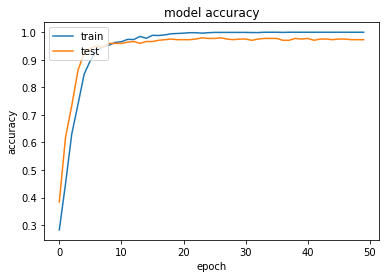

In [117]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


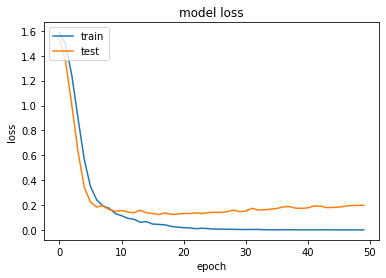

In [118]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


In [109]:
pred1 = model.predict(data)

In [111]:
pred1.shape

(2225, 5)

In [112]:
pred_label = [0] * pred1.shape[0]
for row in range(pred1.shape[0]):
    pred_label[row] = np.argmax(pred1[row])
    



# Intermediate Layer

In [165]:
layer_name = 'sent_dropout'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_layer_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

# https://keras.io/getting-started/faq/#how-can-i-obtain-the-output-of-an-intermediate-layer
intermediate_output = intermediate_layer_model.predict(data)

# Clustering

In [166]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



### K-Means

In [170]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(intermediate_output)
clusters_kmeans = kmeans.labels_

In [176]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(actual_labels, clusters_kmeans)

0.9865141668219073

https://www.kaggle.com/hsankesara/news-classification-using-han/notebook<br>
https://humboldt-wi.github.io/blog/research/information_systems_1819/group5_han/

